In [136]:
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../..')
from funcs.stats import get_stats
from funcs.xarray_tools import find_cor_ts
from funcs.plotting import map_grid_clean
from constants.colors import loc_colors

from taus import decorrelation_temporal_model

In [165]:
# fps = list(Path('/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar').glob('*_tau.nc'))
fps = list(Path('/bsuhome/zacharykeskinen/scratch/coherence/uavsar').glob('*_tau.nc'))
dss = {fp.stem.replace('_v2',''): xr.open_dataset(fp).sel(pol = 'VV') for fp in fps}
df = pd.read_csv(Path('/bsuhome/zacharykeskinen/uavsar-coherence/data/snotel').joinpath('snotel_uavsar_diffs_v2.csv'))
df = df[df['pol'] == 'VV']

fig_dir = Path('/Users/rdcrlzh1/Documents/uavsar-coherence/snow/')

In [176]:
data['swe_diff'].quantile([0.25, 0.5, 0.75])

0.25    0.012700
0.50    0.022900
0.75    0.045075
Name: swe_diff, dtype: float64

In [186]:
df['swe_diff'].min()

-0.3912

In [187]:
df['swe_diff_bins'] = pd.cut(df['swe_diff'], bins = [-10, 0, 0.02, 10])


0.35324445362359663
0.18420142541604922


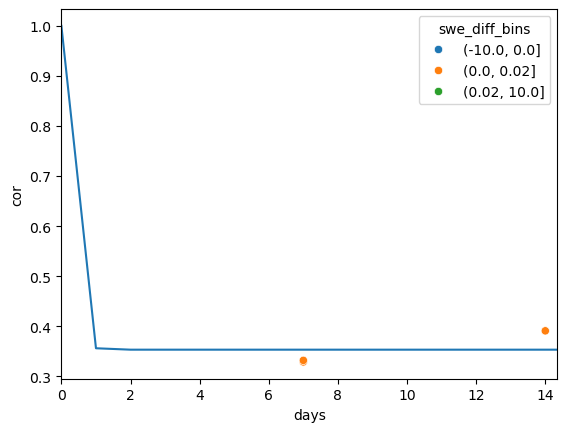

0.5999999999999999
2.9292326051929294


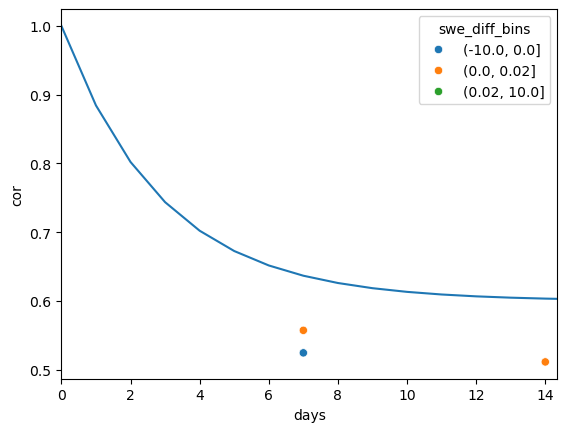

0.5827175084530645
1.7771680277136066


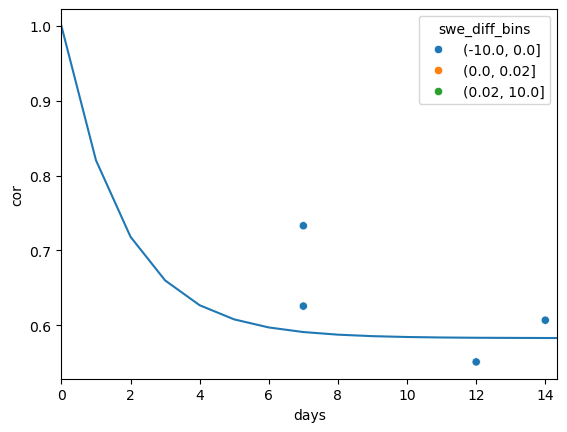

0.3932929370444851
2.2689304749896935


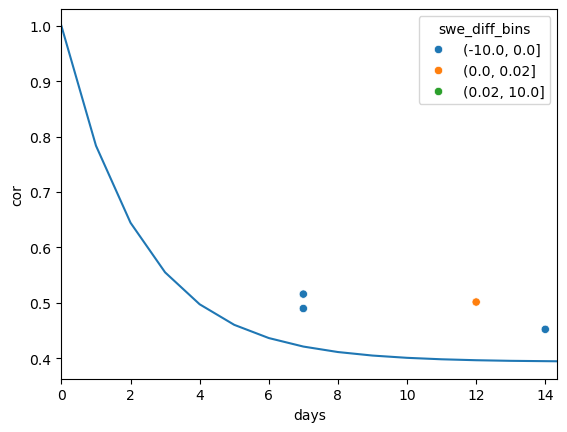

0.5302386224109116
3.2001456388063505


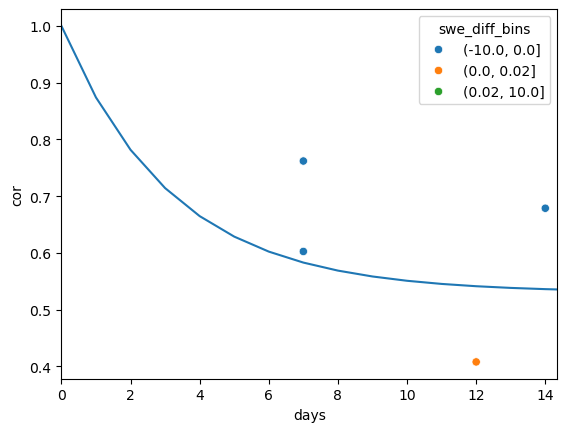

0.23732812745850992
6.804747452898749


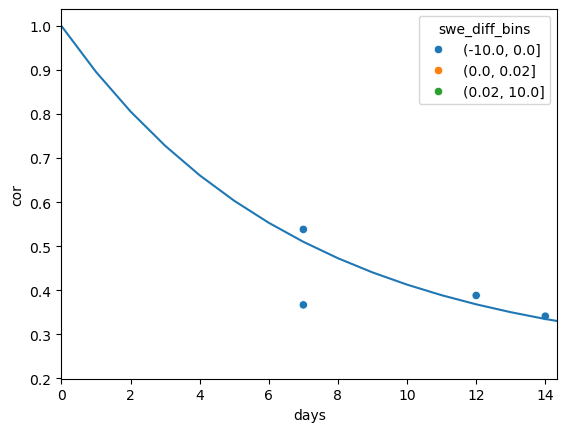

0.416582299776291
6.536964045582581


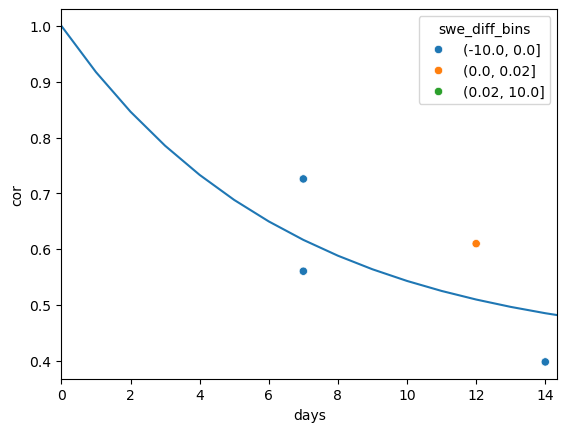

0.07356939864433265
26.027059594261292


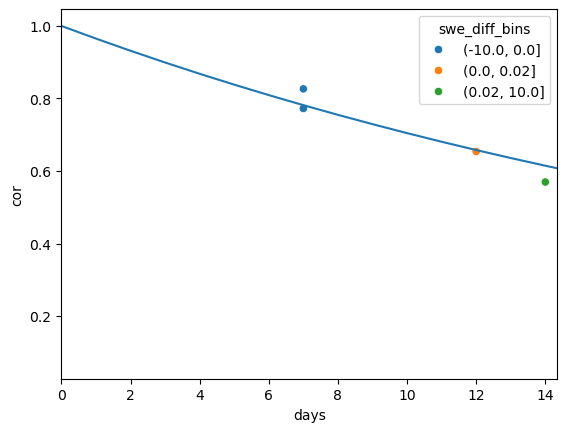

0.44783365106634515
0.14243495846467907


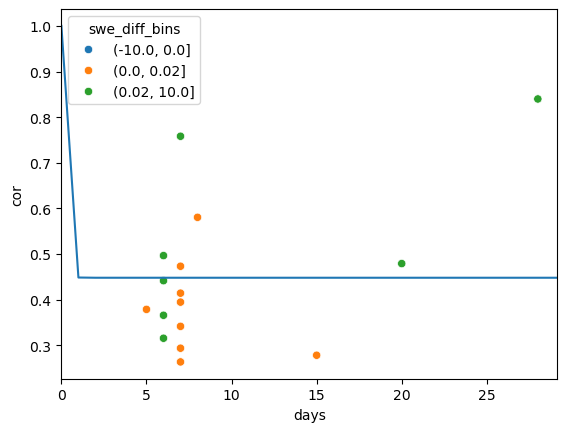

0.4334322524925943
0.12511437248944796


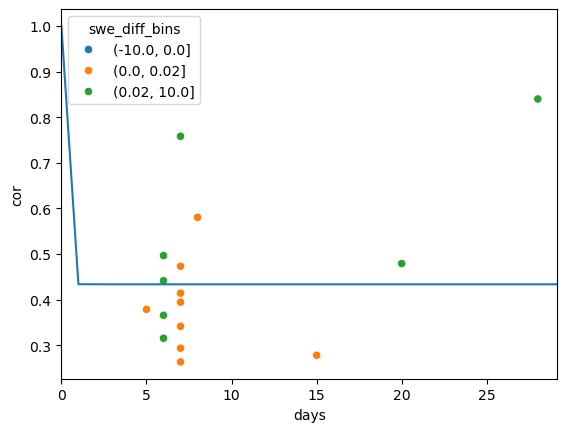

0.3351714689011746
3.736922595507889


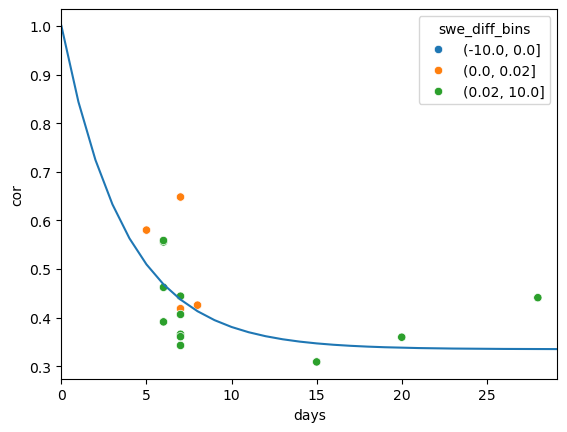

0.3289881611559706
4.634269457615274


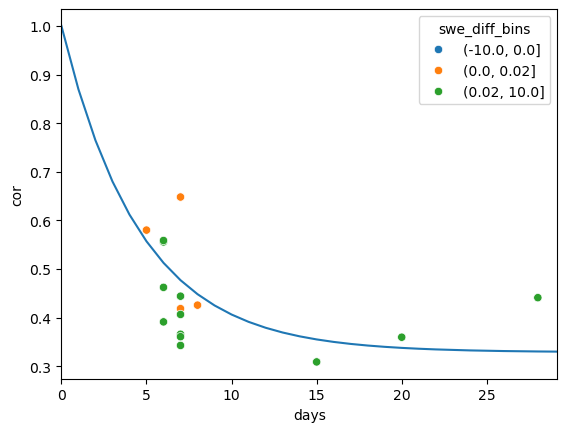

0.4091112434190689
4.062329663503206


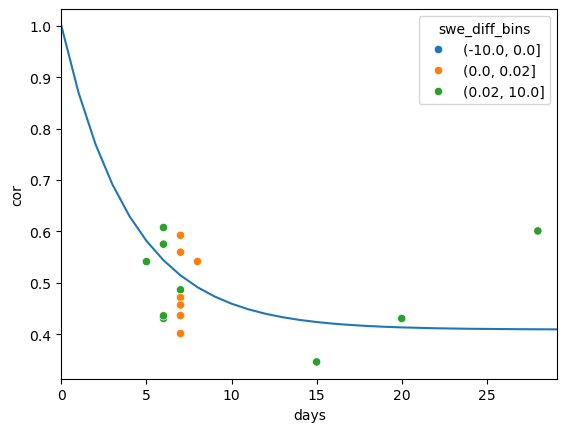

0.3562238223652743
4.4423931309477


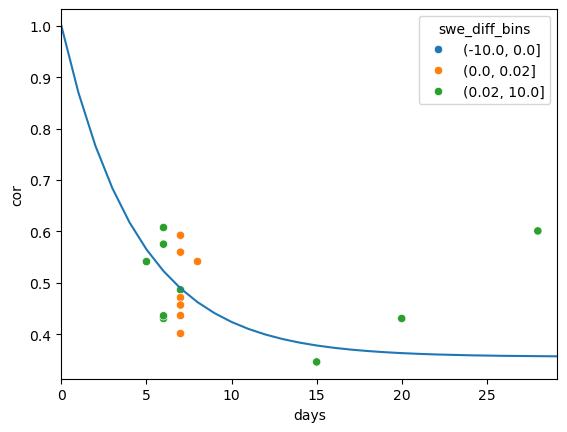

0.38758386810839807
0.16549716538907175


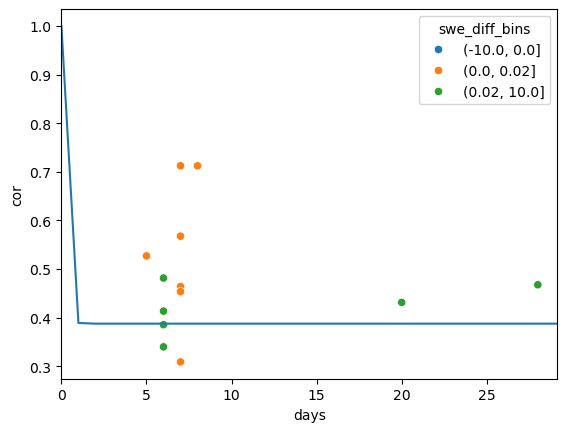

0.5498273997184159
0.10825975734805293


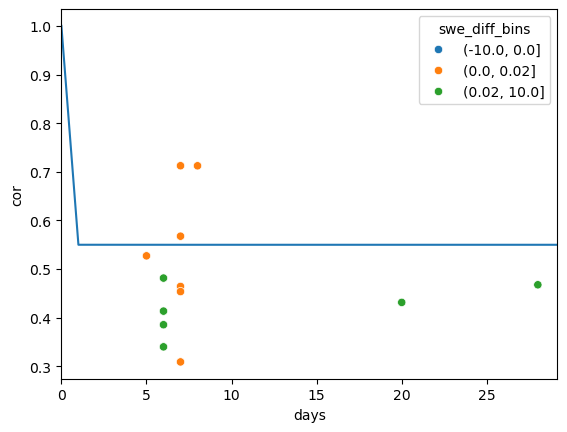

0.4641379203132086
2.701252980769224


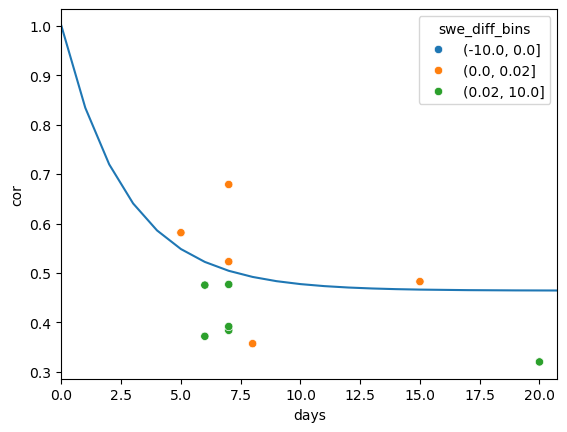

0.3674327278557018
3.8469940690518807


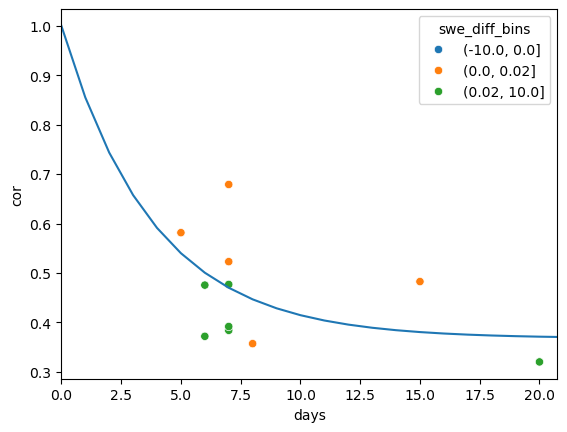

0.4358490616089502
0.1280840792650676


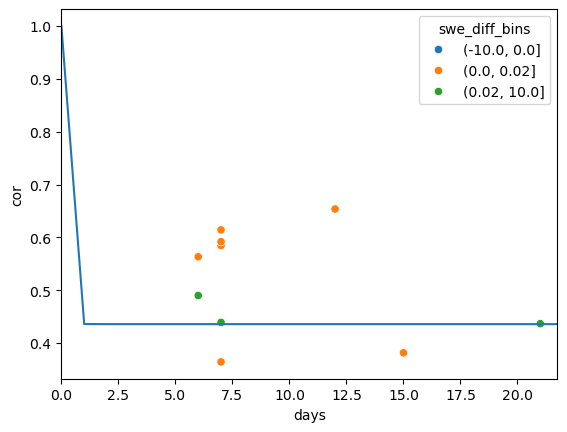

0.4482516415898103
2.9031477891322046


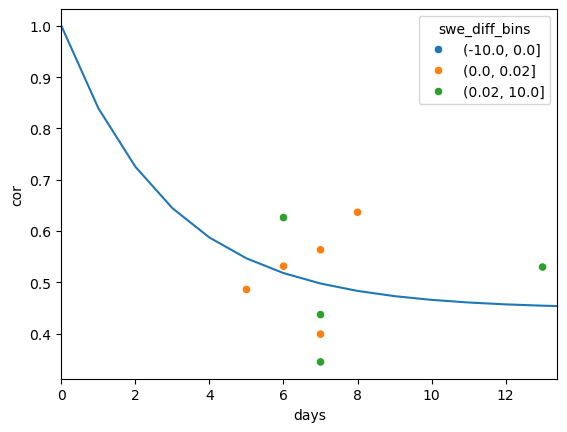

0.4049912953439273
4.286378587528951


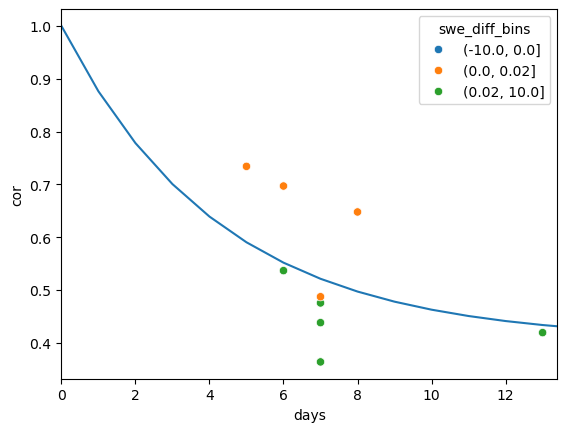

0.4306801628238505
3.90941738392987


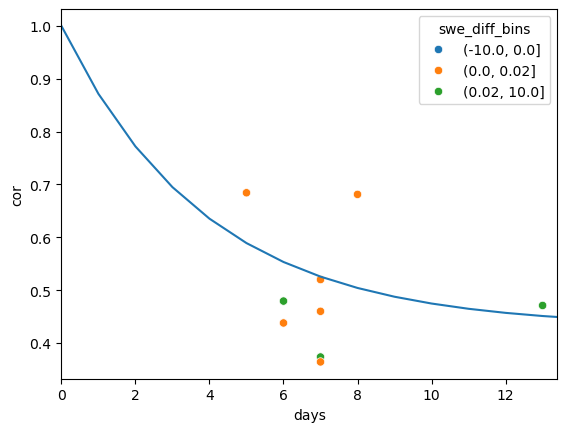

0.3235645856860167
4.335132565913851


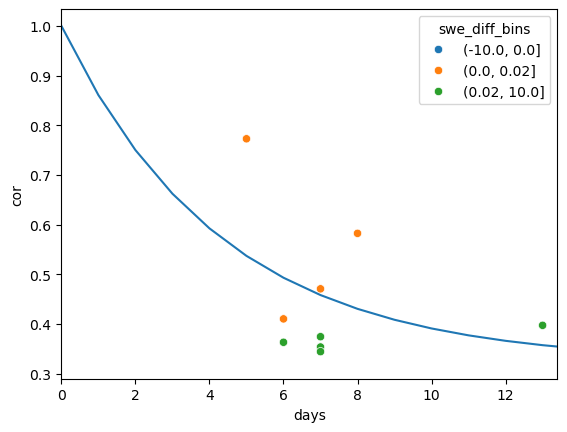

0.4476323988837076
4.634454164663154


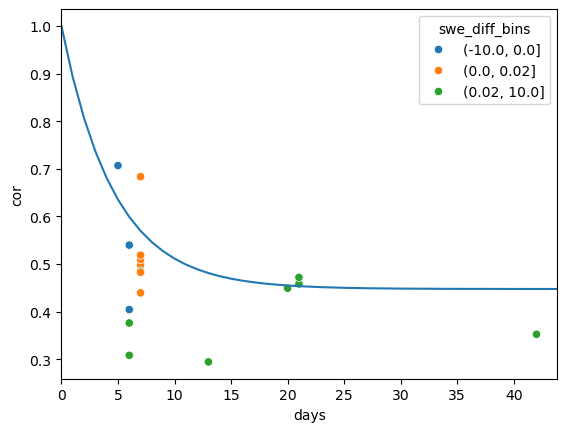

0.47046856162927736
0.20456469495614824


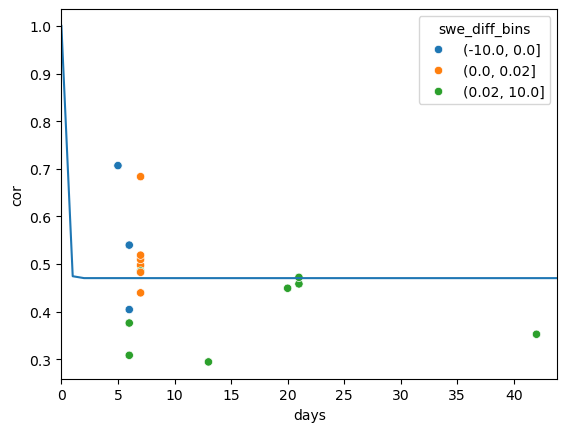

0.3644265699932698
6.469468647471953


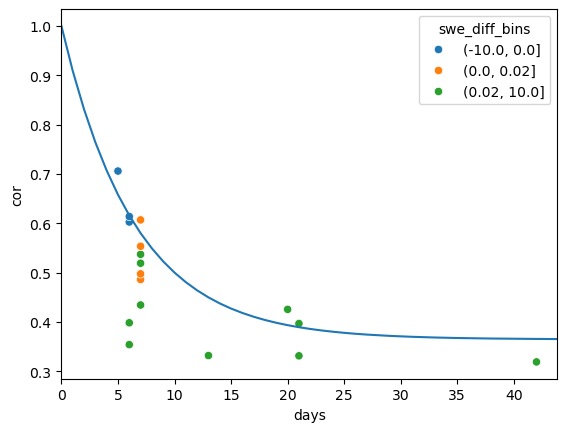

0.2659454437011581
7.1014067730657455


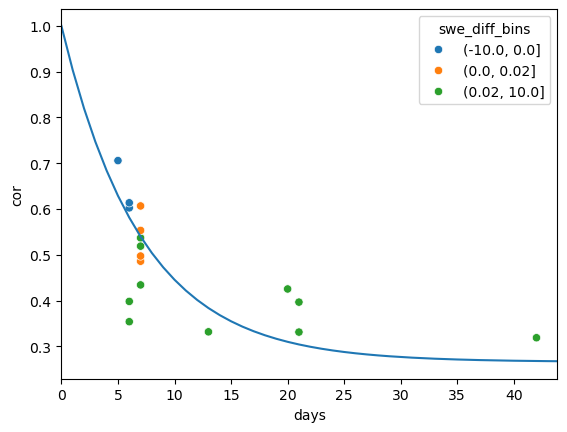

0.364923510118698
5.011796830345511


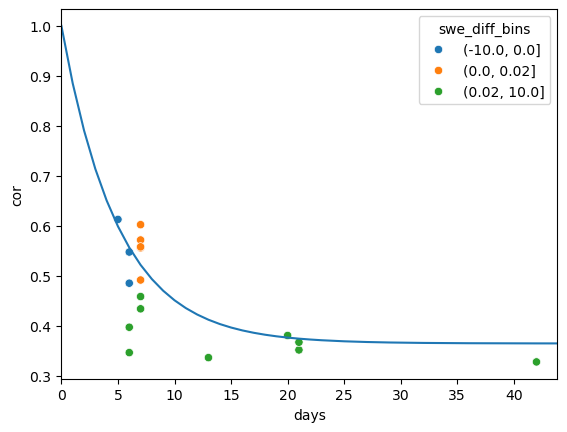

0.35678343529019807
5.832517563593918


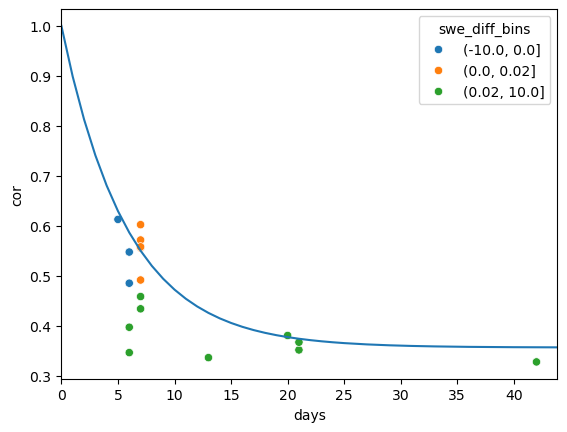

nan
nan


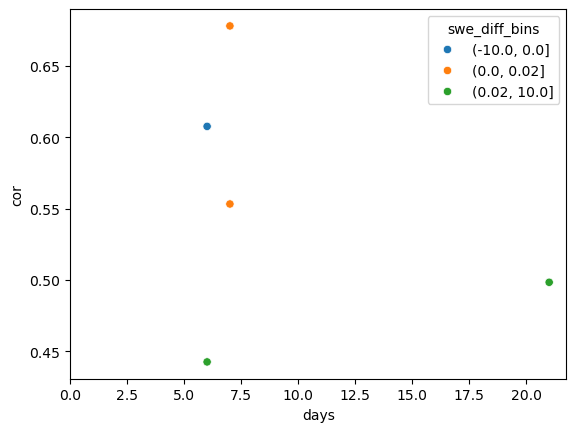

0.5824670767628988
2.443431841898006


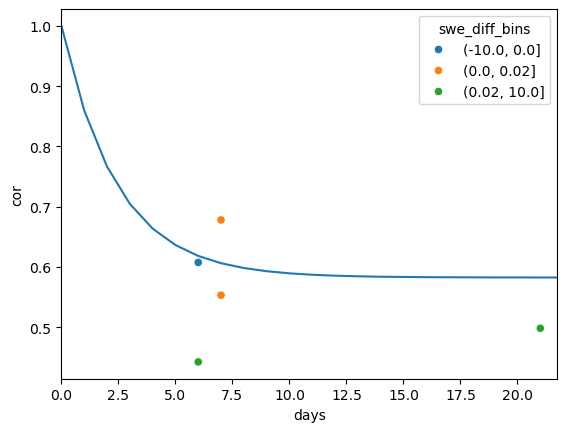

0.400097443233475
5.039723576130132


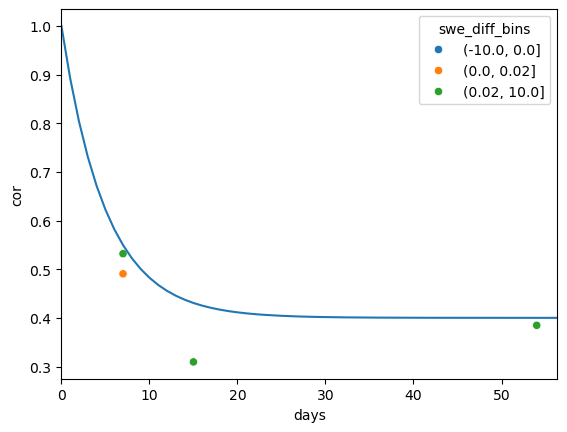

0.314632418292606
2.364569793689103


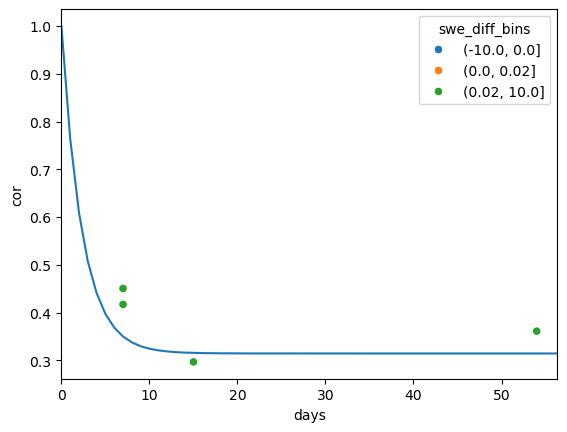

0.4858031356709822
5.013155277327668


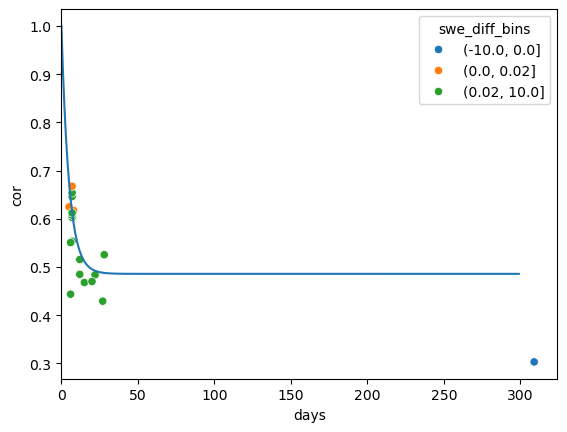

0.5258511113990497
3.8114086083213183


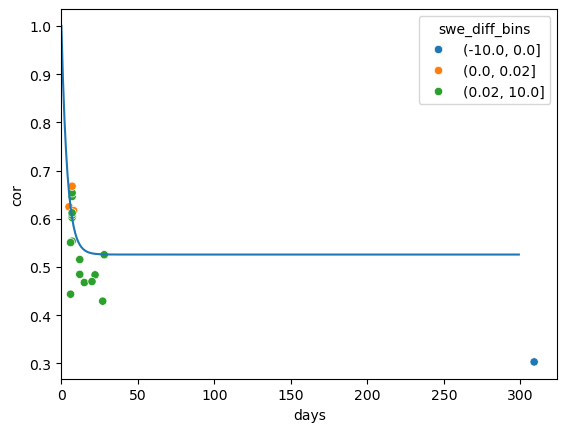

0.43949443013570966
4.750530640547186


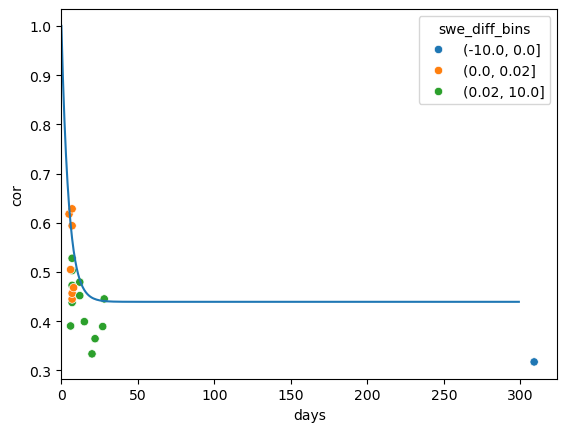

0.4004095262211262
4.544527323406372


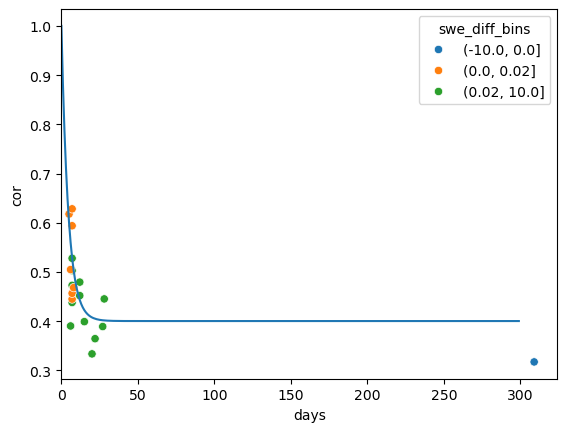

0.35291078701116907
2.6347205454167253


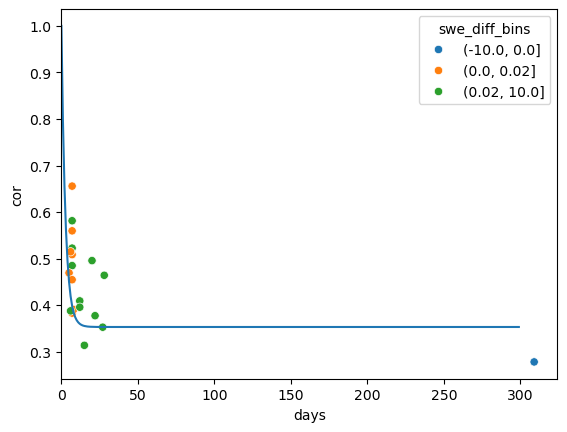

0.40619023289823075
5.21272001124872


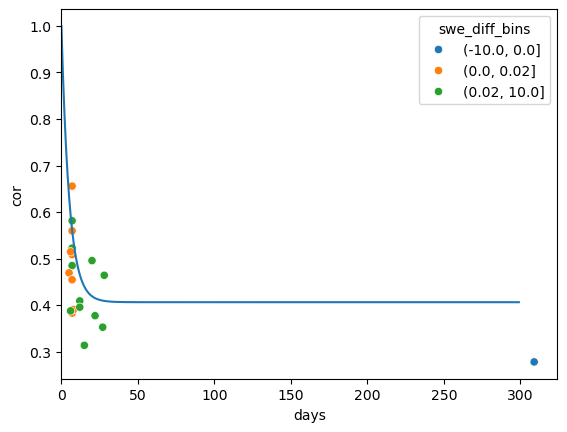

0.28952953502208945
6.744754028361081


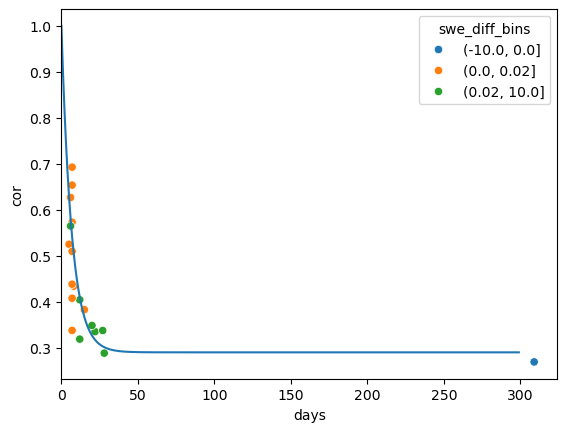

0.3462784155249691
2.92747881537346


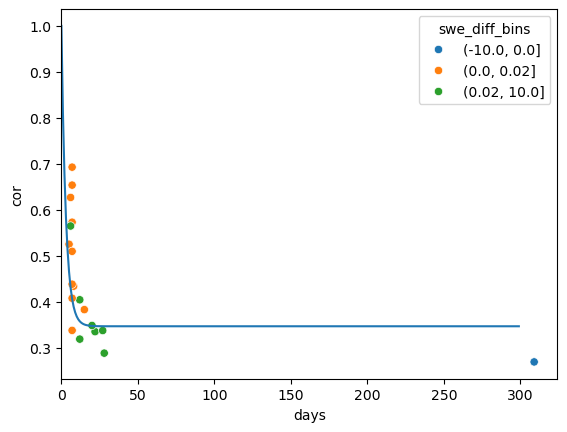

0.26358598965964436
9.346485859551958


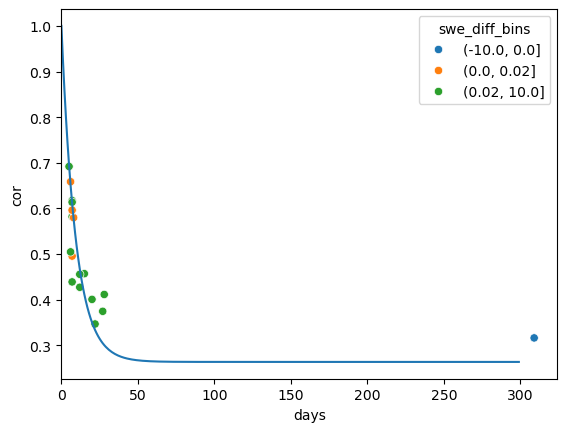

0.39815968151132913
3.760551078281429


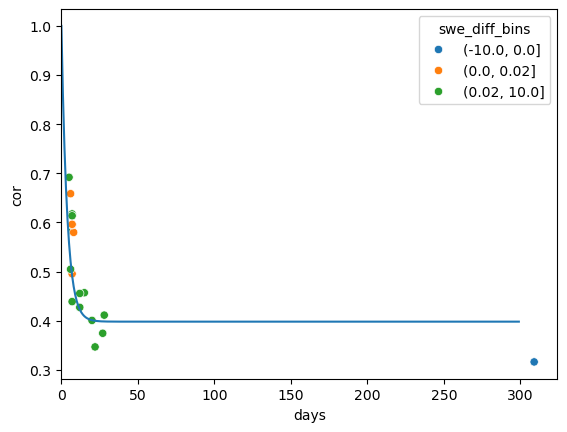

0.3352749595779315
6.887910151746034


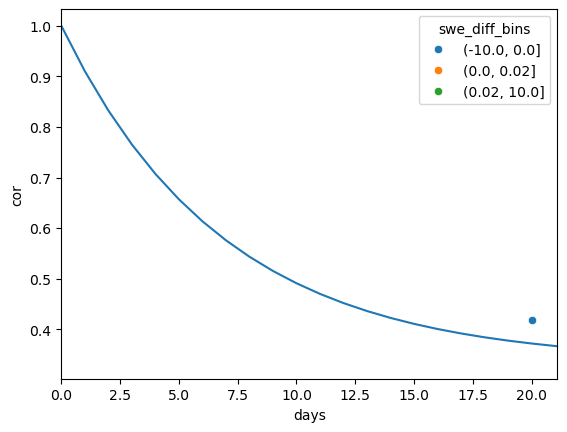

0.2955115677617663
3.6977175893103125


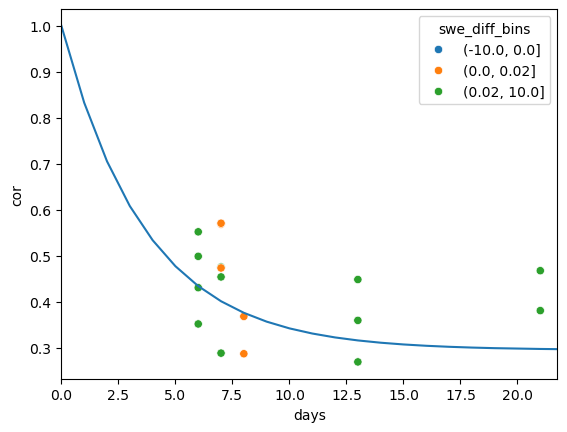

0.41303228341492154
2.9282930475099014


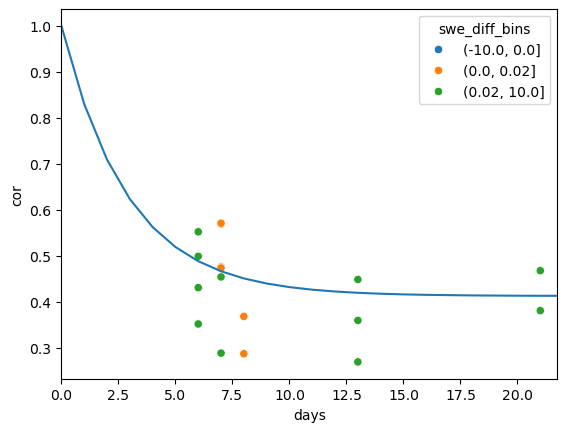

0.359119273626019
3.0008881389425612


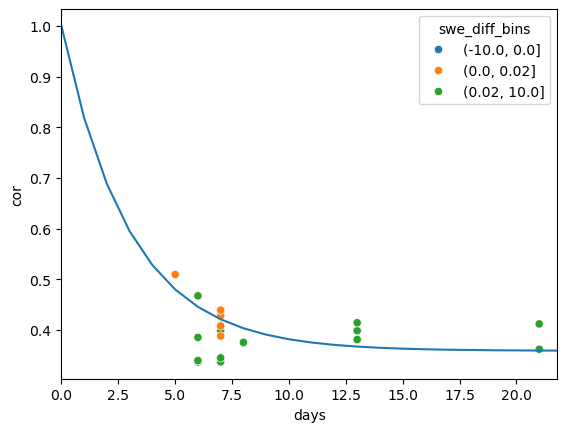

0.4615547879781998
0.07928107988101002


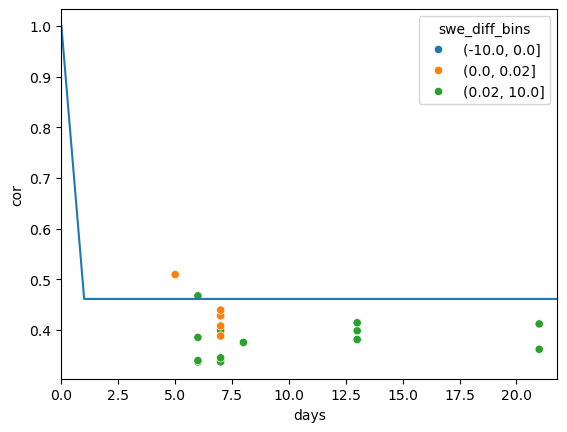

0.4163987025377833
2.576696895874553


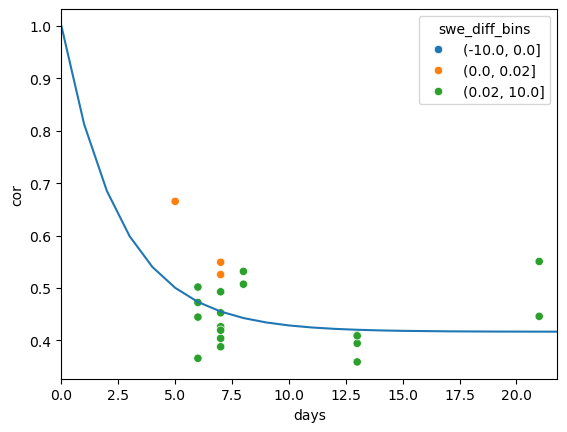

0.4702128832226041
2.4688139663737494


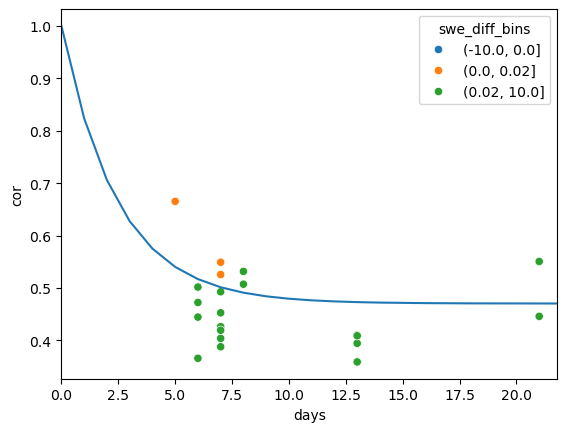

0.386365671769146
2.505662597653845


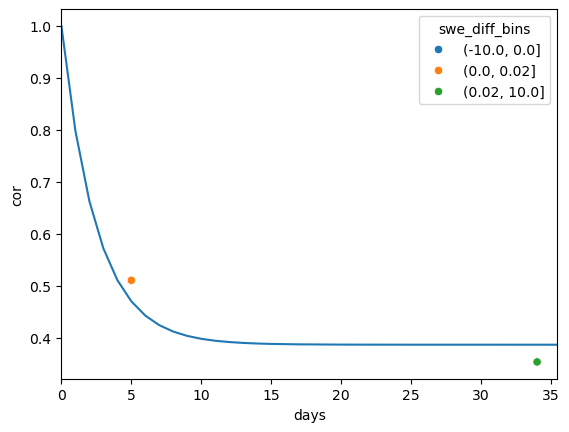

In [188]:
snotel_list = pd.read_csv('~/uavsar-coherence/data/snotel/snotel-list.csv', index_col=['State', 'ID'])
snotel_list.index = snotel_list.index.set_levels(snotel_list.index.levels[1].str.replace('\t', ''), level=1)
state_abbr = {'Colorado':'CO', 'Idaho': 'ID', 'California':'CA', 'New Mexico': 'NM', 'Utah': 'UT', 'Montana': 'MT'}
state_abbr = {v: k for k, v in state_abbr.items()}

for snotel_id in df.snotel.unique():
    for heading in df[df.snotel == snotel_id].heading.unique():
        sid, state, network = snotel_id.split(':')
        snotel_meta = snotel_list.loc[(state_abbr[state], sid)]
        lat, long = snotel_meta['Latitude'], snotel_meta['Longitude']
        g_inf, tau = dss[f"{df[df.snotel == snotel_id]['site'].iloc[0]}_v3_tau"].sel(x = long, y = lat, method = 'nearest')['curvefit_coefficients'].sel(heading = heading).values
        print(g_inf)
        print(tau)
        # df[df.snotel == snotel_id].plot.scatter(x = 'days', y = 'cor')
        fig, ax = plt.subplots()
        sns.scatterplot(data = df[df.snotel == snotel_id], x = 'days', y = 'cor', hue = 'swe_diff_bins', ax = ax)
        plt.xlim(left = 0)
        xs = np.arange(300)
        ax.plot(xs, decorrelation_temporal_model(xs, g_inf, tau))
        plt.show()

rockmt_v3_tau
fraser_v3_tau
lowman_v3_tau
stlake_v3_tau


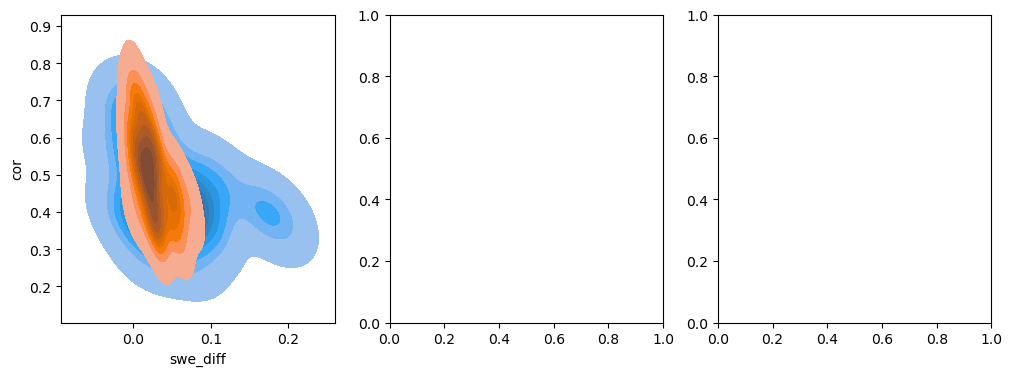

In [210]:
fig, axes= plt.subplots(1,3 , figsize = (12, 4))
# gs = axes[0, 1].get_gridspec()
# for ax in axes[1, :]: ax.remove()
# axbig = fig.add_subplot(gs[1, :])

data = df[df.days > 4].copy()#.loc[df.snotel.isin((df[df.days < 8].value_counts('snotel') > 20).index)]

ax = axes[0]
data['dt_bins'] = pd.cut(data['days'], bins = [5, 10, 15, 300])
# sns.scatterplot(x='swe_diff', y='cor', hue = 'dt_bins', data=data, ec=None, legend=True, ax= ax, palette = 'Blues', zorder= 1e4)#, hue_norm=(0,30))
# sns.kdeplot(x = 'swe_diff', y = 'cor', data = df, hue = 'dt_bins', ax = axes[0])
# sns.kdeplot(x = 'swe_diff', y = 'cor', data = df, ax= axes[0], fill=False)
# sns.kdeplot(x = 'swe_diff', y = 'cor', data = df[df.days > 10], ax= axes[0], fill = False)
sns.kdeplot(x = 'swe_diff', y = 'cor', data = df[(df.days > 7) & (df.days < 14)], ax= axes[0], fill=True, thresh = 0.01)
sns.kdeplot(x = 'swe_diff', y = 'cor', data = df[df.days < 7], ax= axes[0], fill=True, thresh = 0.01)

ax = axes[1]
from itertools import product
cohs = []
sds = []
for stem, ds_full in dss.items():
    